# Employee Churn Model -->

## Import Libraries -->

In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import warnings 
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Import Libraries for data visualization -->


In [ ]:
!pip install chart-studio

     |████████████████████████████████| 64 kB 2.6 MB/s 


In [ ]:
!pip install cufflinks

In [ ]:
!pip install xgboost

In [ ]:
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None

#Standard plotly imports
from chart_studio.plotly import plotly as py
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

import cufflinks as cf
cf.set_config_file(offline = True)
import cufflinks
cufflinks.go_offline(connected = True)

In [ ]:
# sklearn modules for preprocessing 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection

from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# Libraries for data modelling

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score


In [ ]:
# importing misceallenous libraries
import os
import re
import sys
import timeit
import string
from datetime import datetime
from time import time
from dateutil.parser import parse

## Import dataset -->

In [ ]:
# Read Excel file
df_sourcefile = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Examples/Employee Churm/WA_Fn-UseC_-HR-Employee-Attrition.csv')
print("Shape of dataframe is: {}".format(df_sourcefile.shape))

Shape of dataframe is: (1470, 35)


In [ ]:
# Make a copy of the original sourcefile
df_HR = df_sourcefile.copy()

## Overview the dataset -->


In [ ]:
df_HR.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df_HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df_HR.columns.to_series().groupby(df_HR.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

In [ ]:
df_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Numerical Features Overview -->

In [ ]:
df_HR.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


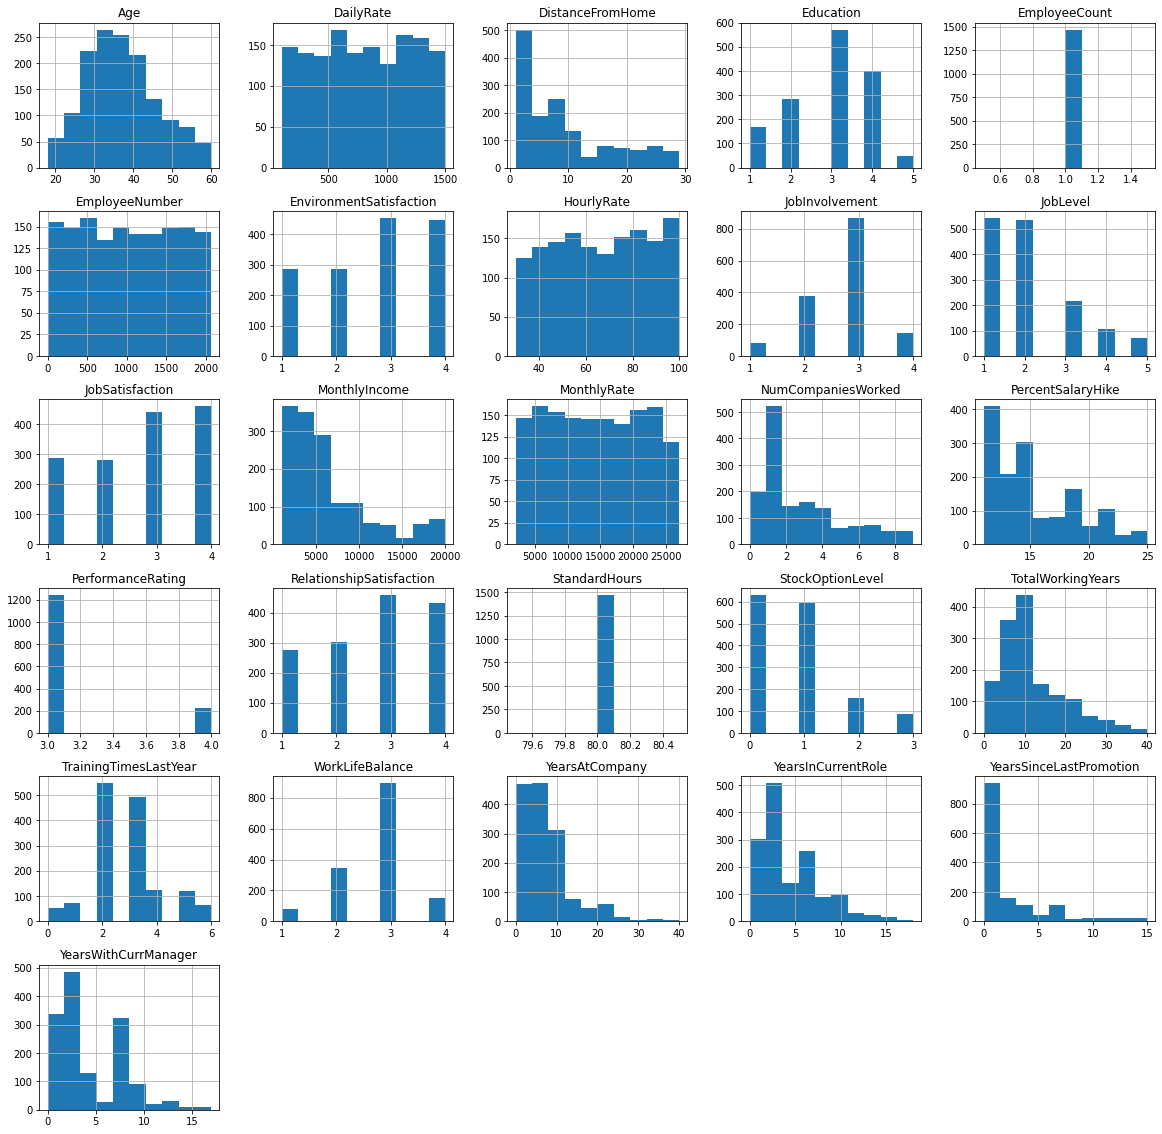

In [ ]:
df_HR.hist(figsize=(20,20))
plt.show()

In [ ]:
(mu, sigma) = norm.fit(df_HR.loc[df_HR['Attrition'] == 'Yes', 'Age'])
print(
    'Ex-exmployees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(mu, sigma))
(mu, sigma) = norm.fit(df_HR.loc[df_HR['Attrition'] == 'No', 'Age'])
print('Current exmployees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(
    mu, sigma))

Ex-exmployees: average age = 33.6 years old and standard deviation = 9.7
Current exmployees: average age = 37.6 years old and standard deviation = 8.9


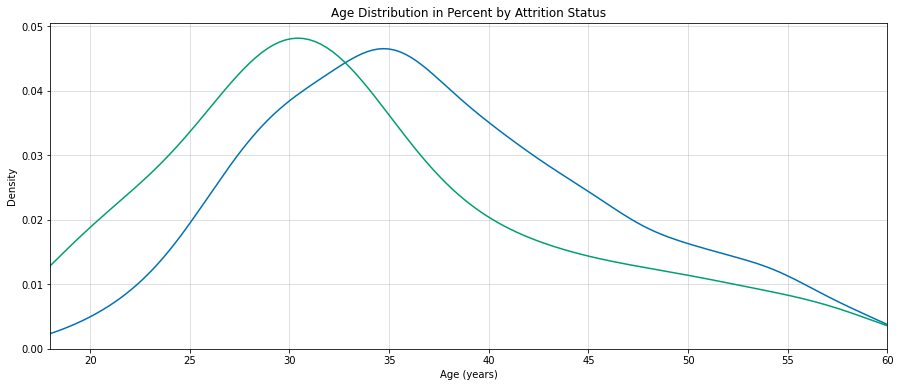

In [ ]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'Age'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'Age'], label = 'Ex-Employees')
plt.xlim(left=18, right=60)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Age Distribution in Percent by Attrition Status');

In [ ]:
df_HR['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

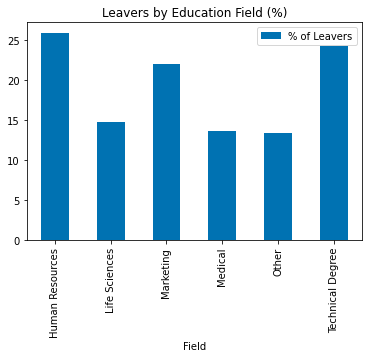

In [ ]:
df_EducationField = pd.DataFrame(columns=["Field", "% of Leavers"])
i=0
for field in list(df_HR['EducationField'].unique()):
    ratio = df_HR[(df_HR['EducationField']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['EducationField']==field].shape[0]
    df_EducationField.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_EF = df_EducationField.groupby(by="Field").sum()
df_EF.plot(kind='bar',title='Leavers by Education Field (%)')

In [ ]:
df_HR['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [ ]:
print("Normalised gender distribution of ex-employees in dataset: Male = {:.1f}% ; Female {:.1f}%".format((df_HR[(df_HR['Attrition']== 'Yes') &  (df_HR['Gender']== 'Male')].shape[0] / df_HR[df_HR['Gender']== 'Male'].shape[0])*100,
      (df_HR[(df_HR['Attrition']== 'Yes') & (df_HR['Gender'] == 'Female')].shape[0]/ df_HR[df_HR['Gender']== 'Female'].shape[0])*100))

Normalised gender distribution of ex-employees in dataset: Male = 17.0% ; Female 14.8%


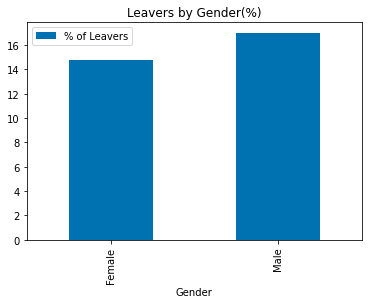

In [ ]:
df_Gender = pd.DataFrame(columns=["Gender", "% of Leavers"])
i = 0
for field in list(df_HR['Gender'].unique()):
  ratio = df_HR[(df_HR['Gender']== field)&(df_HR['Attrition'] == 'Yes')].shape[0] / df_HR[df_HR['Gender'] == field].shape[0]
  df_Gender.loc[i] = (field, ratio*100)
  i +=1
df_G = df_Gender.groupby(by = "Gender").sum()
df_G.plot(kind = 'bar', title = 'Leavers by Gender(%)')

In [ ]:
df_HR['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In Single, the ratio of leavers is 25.53%
In Married, the ratio of leavers is 12.48%
In Divorced, the ratio of leavers is 10.09%


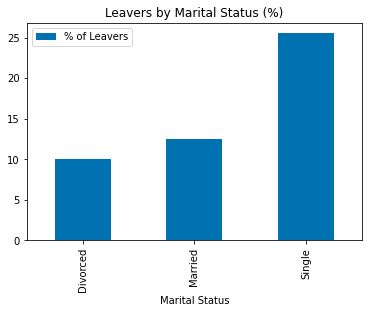

In [ ]:
df_Marital = pd.DataFrame(columns=["Marital Status", "% of Leavers"])
i=0
for field in list(df_HR['MaritalStatus'].unique()):
    ratio = df_HR[(df_HR['MaritalStatus']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['MaritalStatus']==field].shape[0]
    df_Marital.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_MF = df_Marital.groupby(by="Marital Status").sum()
df_MF.plot(kind='bar',title='Leavers by Marital Status (%)');

In [ ]:
print("Distance from home for employees to get to work is from {} to {} miles.".format(df_HR['DistanceFromHome'].min(),
                                                                                       df_HR['DistanceFromHome'].max()))

Distance from home for employees to get to work is from 1 to 29 miles.


In [ ]:
print('Average distance from home for currently active employees: {:.2f} miles and ex-employees: {:.2f} miles'.format(
    df_HR[df_HR['Attrition'] == 'No']['DistanceFromHome'].mean(), df_HR[df_HR['Attrition'] == 'Yes']['DistanceFromHome'].mean()))

Average distance from home for currently active employees: 8.92 miles and ex-employees: 10.63 miles


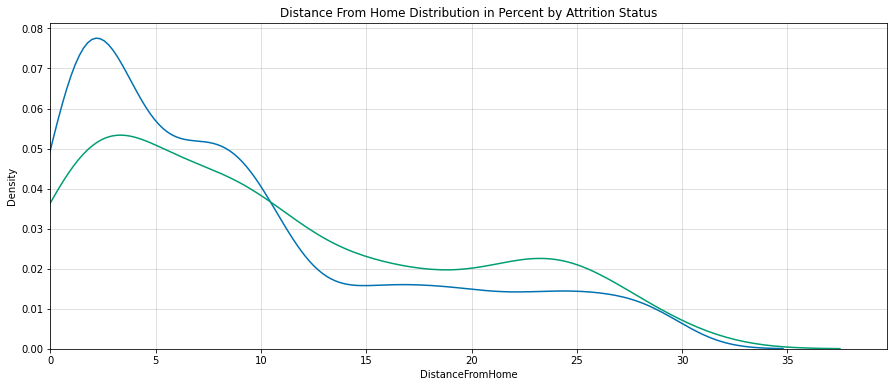

In [ ]:
plt.figure(figsize = (15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha = 0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'DistanceFromHome'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'DistanceFromHome'], label = 'Ex- Employees')
plt.xlabel('DistanceFromHome')
plt.xlim(left = 0)
plt.ylabel('Density')
plt.title('Distance From Home Distribution in Percent by Attrition Status');

In [ ]:
df_HR['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In Sales, the ratio of leavers is 20.63%
In Research & Development, the ratio of leavers is 13.84%
In Human Resources, the ratio of leavers is 19.05%


<Figure size 1080x432 with 0 Axes>

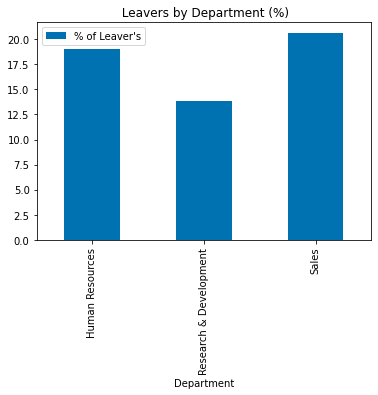

In [ ]:
df_Department = pd.DataFrame(columns = ["Department" , "% of Leaver's"])
i = 0
for field in list(df_HR['Department'].unique()):
    ratio = df_HR[(df_HR['Department'] == field)&(df_HR['Attrition'] == "Yes")].shape[0] / df_HR[df_HR['Department'] == field].shape[0]
    df_Department.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))
df_DF = df_Department.groupby(by = "Department").sum()
plt.figure(figsize = (15,6))
df_DF.plot(kind = 'bar', title = ' Leavers by Department (%)' );

In [ ]:
df_HR['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In Travel_Rarely, the ratio of leavers is 14.96%
In Travel_Frequently, the ratio of leavers is 24.91%
In Non-Travel, the ratio of leavers is 8.00%


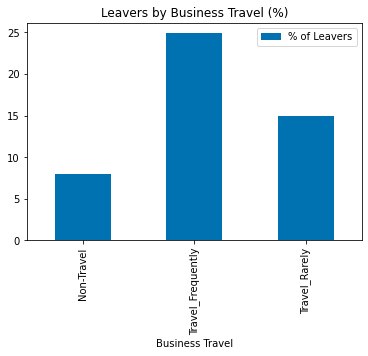

In [ ]:
df_BusinessTravel = pd.DataFrame(columns = ["Business Travel", "% of Leavers"])
i = 0
for field in list(df_HR['BusinessTravel'].unique()):
    ratio = df_HR[(df_HR['BusinessTravel'] == field)&(df_HR['Attrition'] == "Yes")].shape[0] / df_HR[df_HR['BusinessTravel'] == field].shape[0]
    df_BusinessTravel.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))
df_BT = df_BusinessTravel.groupby(by = "Business Travel").sum()
df_BT.plot(kind = 'bar', title = 'Leavers by Business Travel (%)');

In [ ]:
df_HR['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In Sales Executive, the ratio of leavers is 17.48&
In Research Scientist, the ratio of leavers is 16.10&
In Laboratory Technician, the ratio of leavers is 23.94&
In Manufacturing Director, the ratio of leavers is 6.90&
In Healthcare Representative, the ratio of leavers is 6.87&
In Manager, the ratio of leavers is 4.90&
In Sales Representative, the ratio of leavers is 39.76&
In Research Director, the ratio of leavers is 2.50&
In Human Resources, the ratio of leavers is 23.08&


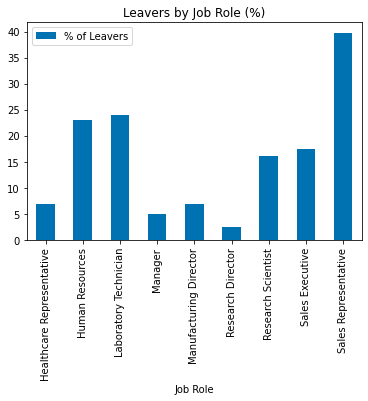

In [ ]:
df_JobRole = pd.DataFrame(columns = ["Job Role", "% of Leavers"])
i = 0
for field in list(df_HR['JobRole'].unique()):
    ratio = df_HR[(df_HR['JobRole'] == field)&(df_HR['Attrition'] == "Yes")].shape[0]/ df_HR[df_HR['JobRole'] == field].shape[0]
    df_JobRole.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}&".format(field, ratio*100))
df_JR = df_JobRole.groupby(by = "Job Role").sum()
df_JR.plot(kind = 'bar', title = 'Leavers by Job Role (%)');

In [ ]:
df_HR['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In 2, the ratio of leavers is 9.74%
In 1, the ratio of leavers is 26.34%
In 3, the ratio of leavers is 14.68%
In 4, the ratio of leavers is 4.72%
In 5, the ratio of leavers is 7.25%


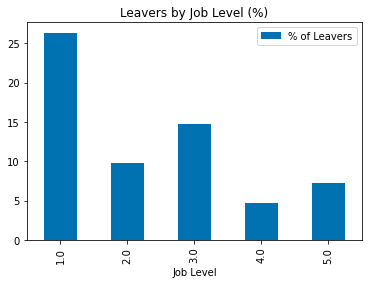

In [ ]:
df_JobLevel = pd.DataFrame(columns = ["Job Level", "% of Leavers"])
i = 0
for field in list(df_HR['JobLevel'].unique()):
    ratio = df_HR[(df_HR['JobLevel'] == field)&(df_HR['Attrition'] == "Yes")].shape[0] / df_HR[df_HR['JobLevel'] == field].shape[0]
    df_JobLevel.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))
df_JL = df_JobLevel.groupby(by = "Job Level").sum()
df_JL.plot(kind = 'bar' , title = 'Leavers by Job Level (%)');

In [ ]:
df_HR['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In 3, the ratio of leavers is 14.40%
In 2, the ratio of leavers is 18.93%
In 4, the ratio of leavers is 9.03%
In 1, the ratio of leavers is 33.73%


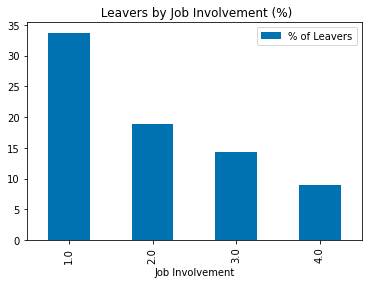

In [ ]:
df_JobInvolvement = pd.DataFrame(columns = ["Job Involvement", "% of Leavers"])

i = 0
for field in list(df_HR['JobInvolvement'].unique()):
    ratio = df_HR[(df_HR['JobInvolvement'] == field) & (df_HR['Attrition'] == "Yes")].shape[0] / df_HR[df_HR['JobInvolvement'] == field].shape[0]
    df_JobInvolvement.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))
df_JI = df_JobInvolvement.groupby(by = "Job Involvement").sum()
df_JI.plot(kind = 'bar', title = ' Leavers by Job Involvement (%)');

In [ ]:
print("Number of training times last year varies from {} to {} years.".format(df_HR['TrainingTimesLastYear'].min(), df_HR['TrainingTimesLastYear'].max()))

Number of training times last year varies from 0 to 6 years.


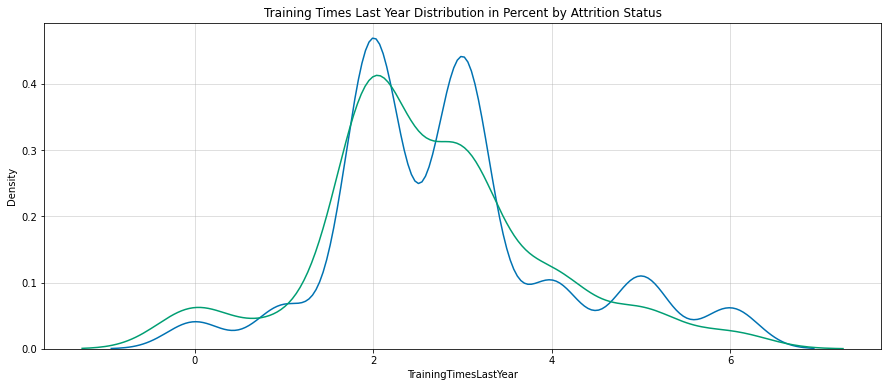

In [ ]:
plt.figure(figsize= (15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha = 0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'TrainingTimesLastYear'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'TrainingTimesLastYear'], label = 'Ex-Employees')
plt.xlabel('TrainingTimesLastYear')
plt.ylabel('Density')
plt.title('Training Times Last Year Distribution in Percent by Attrition Status');

In [ ]:
df_HR['NumCompaniesWorked'].value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

In 8, the ratio of Leavers 12.24%
In 1, the ratio of Leavers 18.81%
In 6, the ratio of Leavers 22.86%
In 9, the ratio of Leavers 23.08%
In 0, the ratio of Leavers 11.68%
In 4, the ratio of Leavers 12.23%
In 5, the ratio of Leavers 25.40%
In 2, the ratio of Leavers 10.96%
In 7, the ratio of Leavers 22.97%
In 3, the ratio of Leavers 10.06%


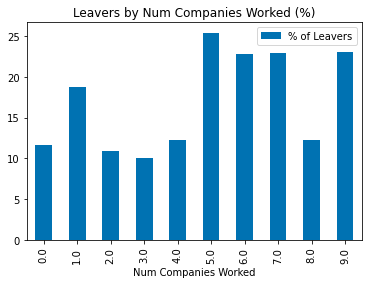

In [ ]:
df_NumCompaniesWorked = pd.DataFrame(columns = ["Num Companies Worked", "% of Leavers"])
i = 0
for field in list(df_HR['NumCompaniesWorked'].unique()):
    ratio = df_HR[(df_HR['NumCompaniesWorked'] == field)&(df_HR['Attrition'] == "Yes")].shape[0]/ df_HR[df_HR['NumCompaniesWorked'] ==  field].shape[0]
    df_NumCompaniesWorked.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of Leavers {:.2f}%".format(field, ratio*100))
df_NC = df_NumCompaniesWorked.groupby(by = "Num Companies Worked").sum()
df_NC.plot(kind = "bar", title = 'Leavers by Num Companies Worked (%)');

In [ ]:
print("Number of Years at the company varies from {} to {} years.".format(df_HR['YearsAtCompany'].min(), df_HR['YearsAtCompany'].max()))

Number of Years at the company varies from 0 to 40 years.


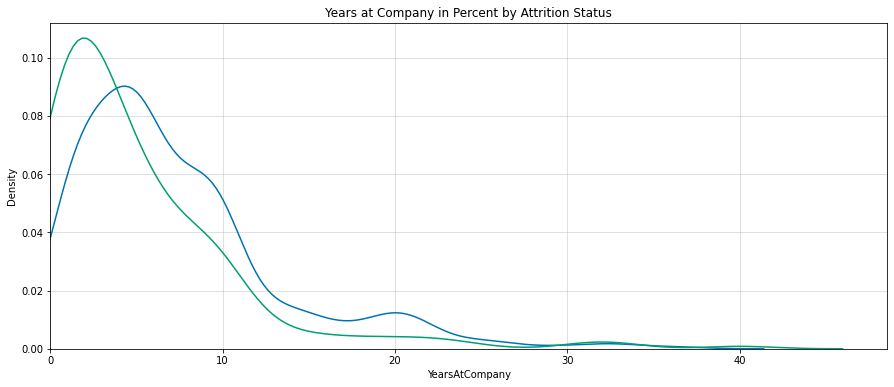

In [ ]:
plt.figure(figsize = (15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha = 0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'YearsAtCompany'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'YearsAtCompany'], label = 'Ex-Employees')
plt.xlabel('YearsAtCompany')
plt.xlim(left = 0)
plt.ylabel('Density')
plt.title('Years at Company in Percent by Attrition Status');

In [ ]:
print("Number of Years in the current role varies from {} to {} years".format(df_HR['YearsInCurrentRole'].min(), df_HR['YearsInCurrentRole'].max()))

Number of Years in the current role varies from 0 to 18 years


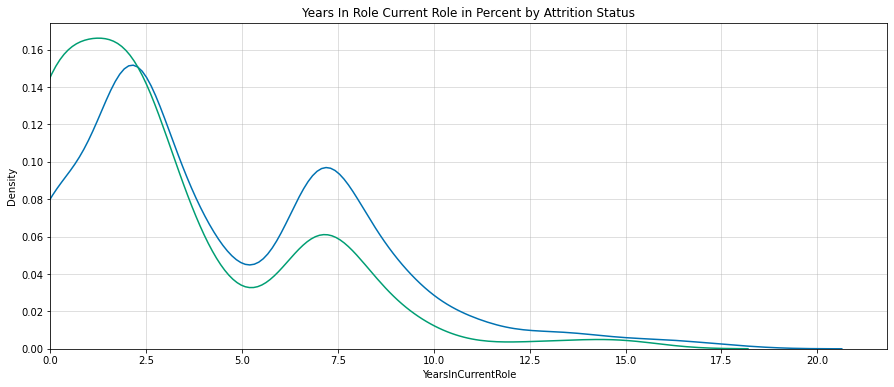

In [ ]:
plt.figure(figsize = (15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha = 0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'YearsInCurrentRole'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'YearsInCurrentRole'], label = 'Ex-Employees')
plt.xlabel('YearsInCurrentRole')
plt.xlim(left = 0)
plt.ylabel('Density')
plt.title('Years In Role Current Role in Percent by Attrition Status');

In [ ]:
print("Numbe of Years since last promotion varies from {} to {} years".format(df_HR['YearsSinceLastPromotion'].min(), df_HR['YearsSinceLastPromotion'].max()))

Numbe of Years since last promotion varies from 0 to 15 years


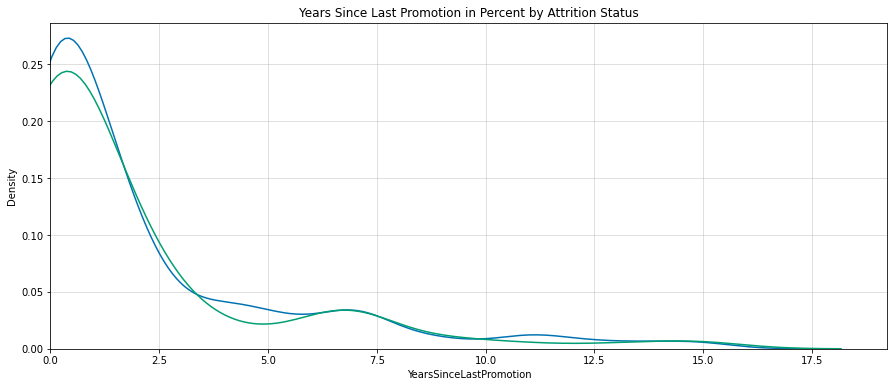

In [ ]:
plt.figure(figsize = (15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha = 0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] =='No', 'YearsSinceLastPromotion'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'YearsSinceLastPromotion'], label = 'Ex-Employees')
plt.xlabel('YearsSinceLastPromotion')
plt.xlim(left = 0)
plt.ylabel('Density')
plt.title('Years Since Last Promotion in Percent by Attrition Status');

In [ ]:
print("Total working years varies from {} to {} years".format(df_HR['TotalWorkingYears'].min(), df_HR['TotalWorkingYears'].max()))

Total working years varies from 0 to 40 years


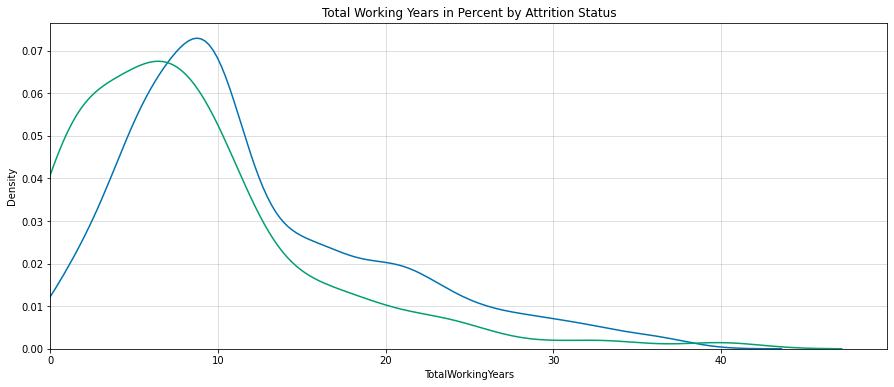

In [ ]:
plt.figure(figsize = (15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha = 0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] =='No', 'TotalWorkingYears'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'TotalWorkingYears'], label = 'Ex-Employees')
plt.xlabel('TotalWorkingYears')
plt.xlim(left = 0)
plt.ylabel('Density')
plt.title('Total Working Years in Percent by Attrition Status');

In [ ]:
print("Number of years with current manager varies from {} to {} years".format(df_HR['YearsWithCurrManager'].min(), df_HR['YearsWithCurrManager'].max()))

Number of years with current manager varies from 0 to 17 years


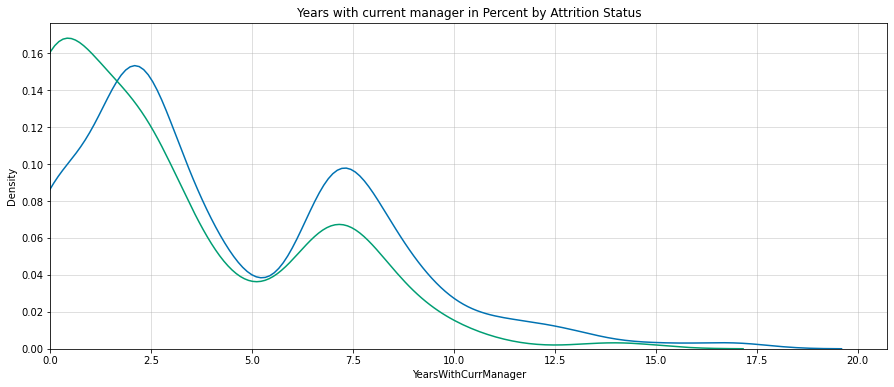

In [ ]:
plt.figure(figsize = (15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha = 0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] =='No', 'YearsWithCurrManager'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'YearsWithCurrManager'], label = 'Ex-Employees')
plt.xlabel('YearsWithCurrManager')
plt.xlim(left = 0)
plt.ylabel('Density')
plt.title('Years with current manager in Percent by Attrition Status');

In [ ]:
df_HR['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In 1, the ratio of Leavers 31.25%
In 3, the ratio of Leavers 14.22%
In 2, the ratio of Leavers 16.86%
In 4, the ratio of Leavers 17.65%


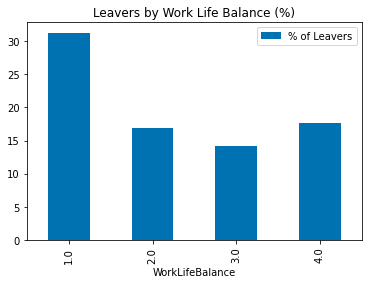

In [ ]:
df_WorkLifeBalance = pd.DataFrame(columns = ["WorkLifeBalance", "% of Leavers"])
i = 0
for field in list(df_HR['WorkLifeBalance'].unique()):
    ratio = df_HR[(df_HR['WorkLifeBalance'] == field)&(df_HR['Attrition'] == "Yes")].shape[0]/ df_HR[df_HR['WorkLifeBalance'] ==  field].shape[0]
    df_WorkLifeBalance.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of Leavers {:.2f}%".format(field, ratio*100))
df_WLB = df_WorkLifeBalance.groupby(by = "WorkLifeBalance").sum()
df_WLB.plot(kind = "bar", title = 'Leavers by Work Life Balance (%)');

In [ ]:
df_HR['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [ ]:
df_HR['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In Yes, the ratio of Leavers 30.53%
In No, the ratio of Leavers 10.44%


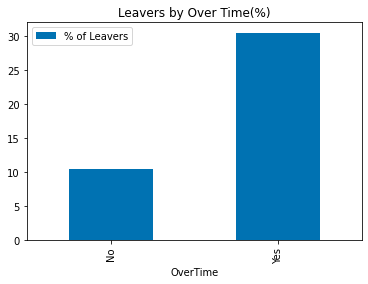

In [ ]:
df_OverTime = pd.DataFrame(columns = ["OverTime", "% of Leavers"])
i = 0
for field in list(df_HR['OverTime'].unique()):
    ratio = df_HR[(df_HR['OverTime'] == field)&(df_HR['Attrition'] == "Yes")].shape[0]/ df_HR[df_HR['OverTime'] ==  field].shape[0]
    df_OverTime.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of Leavers {:.2f}%".format(field, ratio*100))
df_OT = df_OverTime.groupby(by = "OverTime").sum()
df_OT.plot(kind = "bar", title = 'Leavers by Over Time(%)');

In [ ]:
print("Employee Hourly Rate varies from ${} to ${}.".format(df_HR['HourlyRate'].min(), df_HR['HourlyRate'].max()))

Employee Hourly Rate varies from $30 to $100.


In [ ]:
print("Employee Daily Rate varies from ${} to ${}.".format(df_HR['DailyRate'].min(), df_HR['DailyRate'].max()))

Employee Daily Rate varies from $102 to $1499.


In [ ]:
print("Employee Monthly Rate varies from ${} to ${}.".format(
    df_HR['MonthlyRate'].min(), df_HR['MonthlyRate'].max()))

Employee Monthly Rate varies from $2094 to $26999.


In [ ]:
print("Employee Monthly Income varies from ${} to ${}.".format(
    df_HR['MonthlyIncome'].min(), df_HR['MonthlyIncome'].max()))

Employee Monthly Income varies from $1009 to $19999.


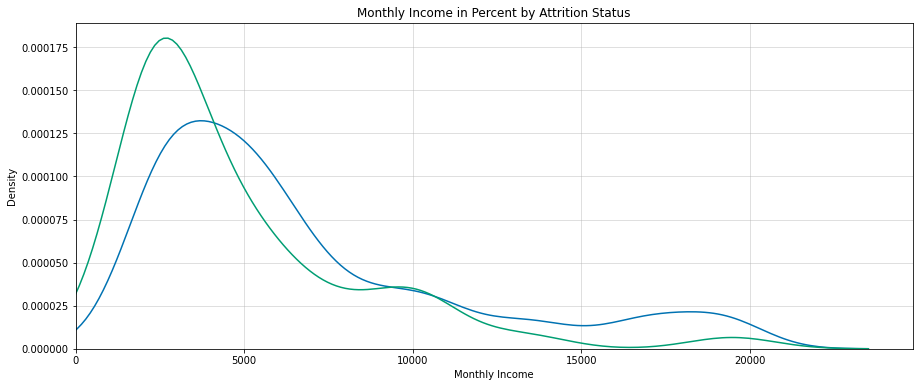

In [ ]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'MonthlyIncome'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'MonthlyIncome'], label = 'Ex-Employees')
plt.xlabel('Monthly Income')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Monthly Income in Percent by Attrition Status');

In [ ]:
print("Percentage Salary Hikes varies from {}% to {}%.".format(
    df_HR['PercentSalaryHike'].min(), df_HR['PercentSalaryHike'].max()))

Percentage Salary Hikes varies from 11% to 25%.


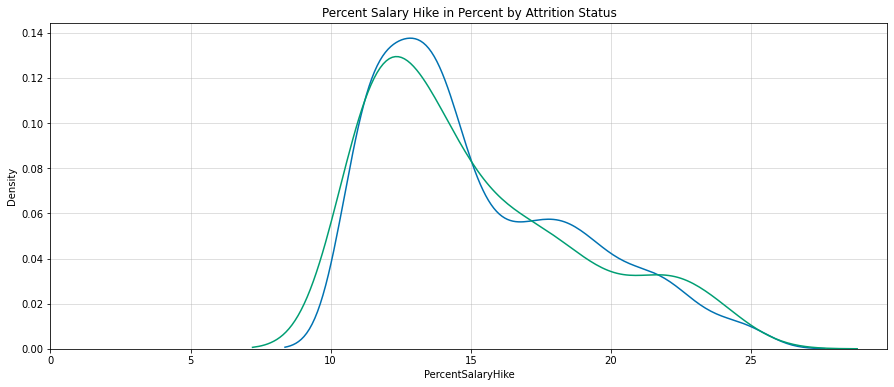

In [ ]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'PercentSalaryHike'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'PercentSalaryHike'], label = 'Ex-Employees')
plt.xlabel('PercentSalaryHike')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Percent Salary Hike in Percent by Attrition Status');

In [ ]:
print("Stock Option Levels varies from {} to {}.".format(
    df_HR['StockOptionLevel'].min(), df_HR['StockOptionLevel'].max()))

Stock Option Levels varies from 0 to 3.


In [ ]:
print("Normalised percentage of leavers by Stock Option Level: 1: {:.2f}%, 2: {:.2f}%, 3: {:.2f}%".format(
    df_HR[(df_HR['Attrition'] == 'Yes') & (df_HR['StockOptionLevel'] == 1)
          ].shape[0] / df_HR[df_HR['StockOptionLevel'] == 1].shape[0]*100,
    df_HR[(df_HR['Attrition'] == 'Yes') & (df_HR['StockOptionLevel'] == 2)
          ].shape[0] / df_HR[df_HR['StockOptionLevel'] == 1].shape[0]*100,
    df_HR[(df_HR['Attrition'] == 'Yes') & (df_HR['StockOptionLevel'] == 3)].shape[0] / df_HR[df_HR['StockOptionLevel'] == 1].shape[0]*100))

Normalised percentage of leavers by Stock Option Level: 1: 9.40%, 2: 2.01%, 3: 2.52%


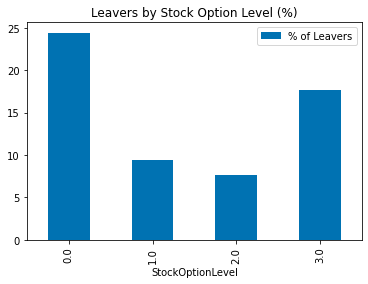

In [ ]:
df_StockOptionLevel = pd.DataFrame(columns=["StockOptionLevel", "% of Leavers"])
i=0
for field in list(df_HR['StockOptionLevel'].unique()):
    ratio = df_HR[(df_HR['StockOptionLevel']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['StockOptionLevel']==field].shape[0]
    df_StockOptionLevel.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_SOL = df_StockOptionLevel.groupby(by="StockOptionLevel").sum()
df_SOL.plot(kind='bar',title='Leavers by Stock Option Level (%)');

In [ ]:
df_HR['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

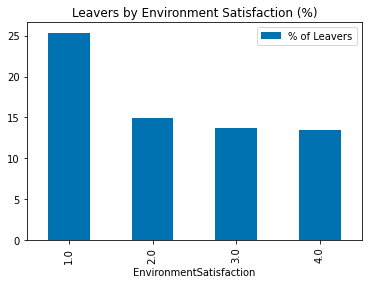

In [ ]:
df_EnvironmentSatisfaction = pd.DataFrame(columns=["EnvironmentSatisfaction", "% of Leavers"])
i=0
for field in list(df_HR['EnvironmentSatisfaction'].unique()):
    ratio = df_HR[(df_HR['EnvironmentSatisfaction']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['EnvironmentSatisfaction']==field].shape[0]
    df_EnvironmentSatisfaction.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_Env = df_EnvironmentSatisfaction.groupby(by="EnvironmentSatisfaction").sum()
df_Env.plot(kind='bar',title='Leavers by Environment Satisfaction (%)');

In [ ]:
df_HR['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

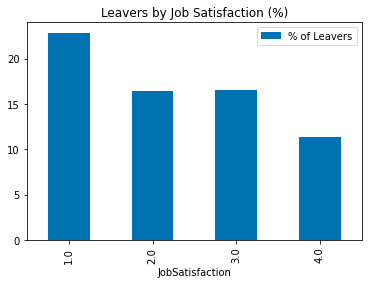

In [ ]:
df_JobSatisfaction = pd.DataFrame(columns=["JobSatisfaction", "% of Leavers"])
i=0
for field in list(df_HR['JobSatisfaction'].unique()):
    ratio = df_HR[(df_HR['JobSatisfaction']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['JobSatisfaction']==field].shape[0]
    df_JobSatisfaction.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JS = df_JobSatisfaction.groupby(by="JobSatisfaction").sum()
df_JS.plot(kind='bar',title='Leavers by Job Satisfaction (%)')

In [ ]:
df_HR['RelationshipSatisfaction'].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

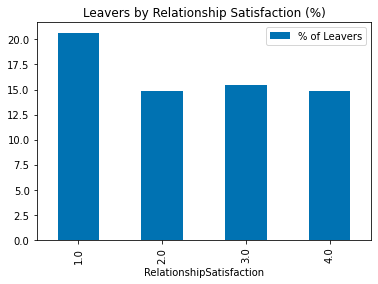

In [ ]:
df_RelationshipSatisfaction = pd.DataFrame(columns=["RelationshipSatisfaction", "% of Leavers"])
i=0
for field in list(df_HR['RelationshipSatisfaction'].unique()):
    ratio = df_HR[(df_HR['RelationshipSatisfaction']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['RelationshipSatisfaction']==field].shape[0]
    df_RelationshipSatisfaction.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_RS = df_RelationshipSatisfaction.groupby(by="RelationshipSatisfaction").sum()
df_RS.plot(kind='bar',title='Leavers by Relationship Satisfaction (%)');

In [ ]:
df_HR['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [ ]:
print("Normalised percentage of leavers by Stock Option Level: 3: {:.2f}%, 4: {:.2f}%".format(
    df_HR[(df_HR['Attrition'] == 'Yes') & (df_HR['PerformanceRating'] == 3)
          ].shape[0] / df_HR[df_HR['StockOptionLevel'] == 1].shape[0]*100,
    df_HR[(df_HR['Attrition'] == 'Yes') & (df_HR['PerformanceRating'] == 4)].shape[0] / df_HR[df_HR['StockOptionLevel'] == 1].shape[0]*100))

Normalised percentage of leavers by Stock Option Level: 3: 33.56%, 4: 6.21%


In 3, the ratio of leavers is 16.08%
In 4, the ratio of leavers is 16.37%


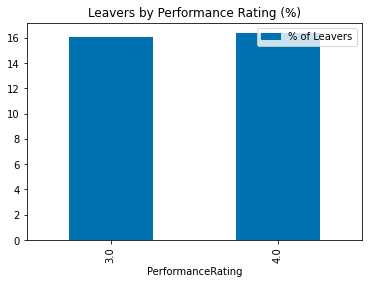

In [ ]:
df_PerformanceRating = pd.DataFrame(columns=["PerformanceRating", "% of Leavers"])
i=0
for field in list(df_HR['PerformanceRating'].unique()):
    ratio = df_HR[(df_HR['PerformanceRating']==field)&(df_HR['Attrition']=="Yes")].shape[0] / df_HR[df_HR['PerformanceRating']==field].shape[0]
    df_PerformanceRating.loc[i] = (field, ratio*100)
    i += 1
    print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_PR = df_PerformanceRating.groupby(by="PerformanceRating").sum()
df_PR.plot(kind='bar',title='Leavers by Performance Rating (%)');

In [ ]:
df_HR['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [ ]:
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    df_HR[df_HR['Attrition'] == 'No'].shape[0] / df_HR.shape[0]*100,
    df_HR[df_HR['Attrition'] == 'Yes'].shape[0] / df_HR.shape[0]*100))

Percentage of Current Employees is 83.9% and of Ex-employees is: 16.1%


In [ ]:
df_HR['Attrition'].plot(kind='hist', xTitle='Attrition',
                         yTitle='count', title='Attrition Distribution');

TypeError: ignored